In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from collections import Counter

In [2]:
def read_twitter():
    tweets_csv = pd.read_csv('tweets.csv')
    return tweets_csv

In [10]:
def tweet_explore(tweets_df):
    unique_tweets = tweets_df.tweet_id.nunique()
    retweeted = tweets_df.retweeted_status_id.nunique()
    return unique_tweets,retweeted

In [55]:
def date_clean(tweets_df):

    tweets_df['month'] = pd.to_datetime(tweets_df['timestamp']).dt.month
    tweets_per_month = tweets_df.groupby(['month'])['tweet_id'].count().reset_index()
    labels = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep' , 'Oct', 'Nov', 'Dec']
    return tweets_per_month , labels

In [37]:
def hashtag_clean(tweets_df):
    hashtags = tweets_df.text.str.findall(r'#.*?(?=\s|$)')
    _hashtags_list = []
    tweets_int = []
    tweets = []
    values = []
    for i in range(0,len(hashtags)):
        if len(hashtags[i]) != 0:
            _hashtags_list.append(hashtags[i])
            
    hashtags_list = [item for sublist in _hashtags_list for item in sublist]
    hashtag_dict = Counter(hashtags_list)

    for k, v in sorted(hashtag_dict.items(), key=lambda x: x[1], reverse=True):
        tweets.append(k)
        values.append(v)
        
    for i in range(0,len(tweets)):
        tweets_int.append(i)
        
    return tweets, tweets_int,values

In [49]:
def mentions_clean(tweets_df):
    friends = tweets_df.text.str.findall(r'@.*?(?=\s|$)')
    _friends_list = []
    for i in range(0,len(friends)):
        if len(friends[i]) != 0:
            _friends_list.append(friends[i])

    friends_list = [item for sublist in _friends_list for item in sublist]
    friends_dict = Counter(friends_list)
    mentions = []
    m_values = []
    for k, v in sorted(friends_dict.items(), key=lambda x: x[1], reverse=True):
        mentions.append(k)
        m_values.append(v)
    friends_int = []
    
    for i in range(0,len(friends_list)):
        friends_int.append(i)
        
    return friends_list, friends_int,m_values

In [42]:
def plot(x,y,z, xlabel, ylabel, title, fig_size, fig_color):
    fig,ax= plt.subplots(nrows=1)
    ax.bar(z[0:5],y[0:5], color = fig_color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(z[0:5], x[0:5])
    fig.set_size_inches(fig_size)
    return

In [58]:
def plot_tweetDate(x,y, xlabel, ylabel, title, fig_size, fig_color):
    fig,ax= plt.subplots(nrows=1)
    ax.bar(x['month'],x['tweet_id'], color = fig_color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(x['month'], y)
    fig.set_size_inches(fig_size)
    return

In [9]:
tweets_df = read_twitter()

In [11]:
unique_tweets,retweeted = tweet_explore(tweets_df)

In [38]:
hashtags ,hashtags_int, values = hashtag_clean(tweets_df)

In [50]:
friends_list, friends_int,m_values = mentions_clean(tweets_df)

In [56]:
month_df , labels = date_clean(tweets_df)

In [12]:
print('Total number of unique tweets:', unique_tweets)
print('Total retweeted tweets', retweeted)

Total number of unique tweets: 939
Total retweeted tweets 487


In [43]:
plot(tweets,values , tweets_int ,'hashtags' , 'Number' , 'Top 5 Tweet Hashtags', (15,5) , 'Green')

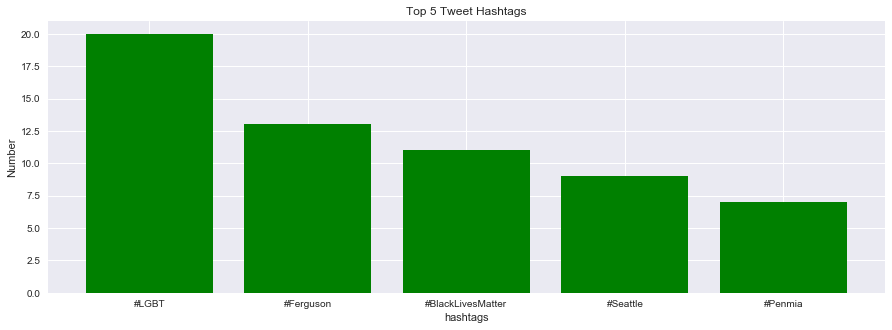

In [44]:
plt.show()

In [51]:
plot(friends_list,m_values , friends_int ,'Friend' , 'Number of Mentions' , 'Top 5 Friend Mentions', (15,5) , 'Green')

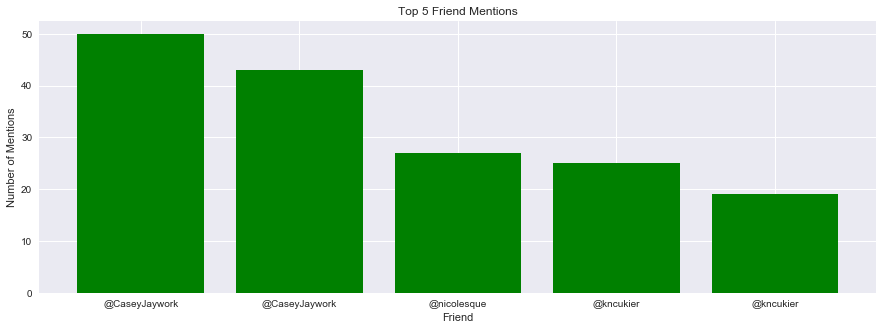

In [52]:
plt.show()

In [59]:
plot_tweetDate(month_df, labels ,'Month' , 'Number of Tweets' , 'Top Per Month', (15,5) , 'Purple')

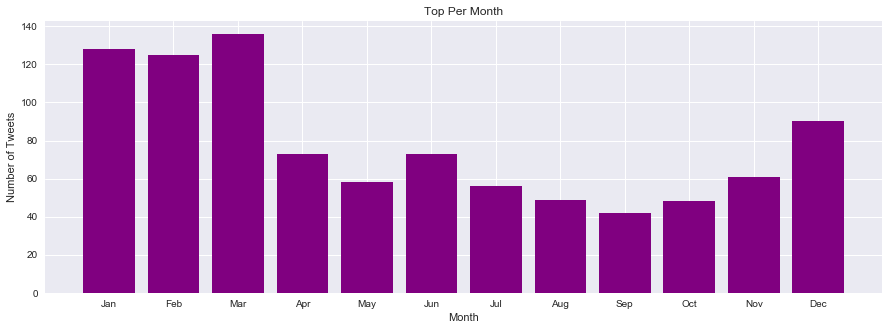

In [60]:
plt.show()